# Notebook 1 - Data Preprocessing Notebook

In this particular notebook, I basically wanted to prepare a clean and meaningful dataset for the machine learning models that I would be using for my project to derive a conclusion for the NASDAQ-100 stock market index. 

My goal in this project is to predict how the NASDAQ-100 index will move in the future using different ML approaches.

Initially, I planned to use a Kaggle dataset that contained daily NASDAQ-100 values. However, after tabulating and analysing the dataset I observed that the dataset only had about 15 months of data which was definitely a big limitation for the project considering the fact that I wanted to develop an efficient ML model. So the Kaggle dataset was big limitation because:
- The dataset was too small for effective machine learning
- I couldn’t capture long-term market behavior
- There were no major events (like 2008 or COVID) to analyze
- The model would not learn meaningful patterns

Because of these issues, I decided to switch to `yfinance`, which allowed me to download **24+ years** of daily NASDAQ-100 data (from 2000 to 2024). This made the dataset much richer and helped me build a more realistic ML pipeline.

Talking more about this specific notebook. I wanted to build this notebook in a way wherein I show exactly how I downloaded the data, cleaned it, created features, and prepared targets for my models.

## What is the NASDAQ-100?

Before delving deep into the project I wanted to give a brief introduction to the concepts and indices that I am working on. 

The NASDAQ-100 is a stock market index that tracks the performance of the 100 largest non-financial companies listed on the NASDAQ exchange.

In simple words, it represents the biggest technology-focused companies in the US which include companies like Apple, Microsoft, NVIDIA, Amazon, Meta, and others.

The index gives a good idea of how the technology sector is certainly moving. Since tech companies drive a big part of the US economy, predicting the NASDAQ-100 can certainly help to understand short-term and long-term market behavior. This is also a primary reason why I wanted to build my project around this because the outcome and conclusions that I would derive could be truly meaningful.

Again, I chose this index because:
- It is popular and widely studied
- The financial meaning behind it is clear
- It reacts strongly to market events, making predictions interesting
- And I have had past experience working with the S&P500 dataset and thus I was motivated to understand the other big stock market index which is the NASDAQ-100.

## Piechart showing NASDAQ-100 sectors

To make the project more insightful I took some time to learn about the sector composition of NASDAQ-100 and I wanted to show this via a piechart.

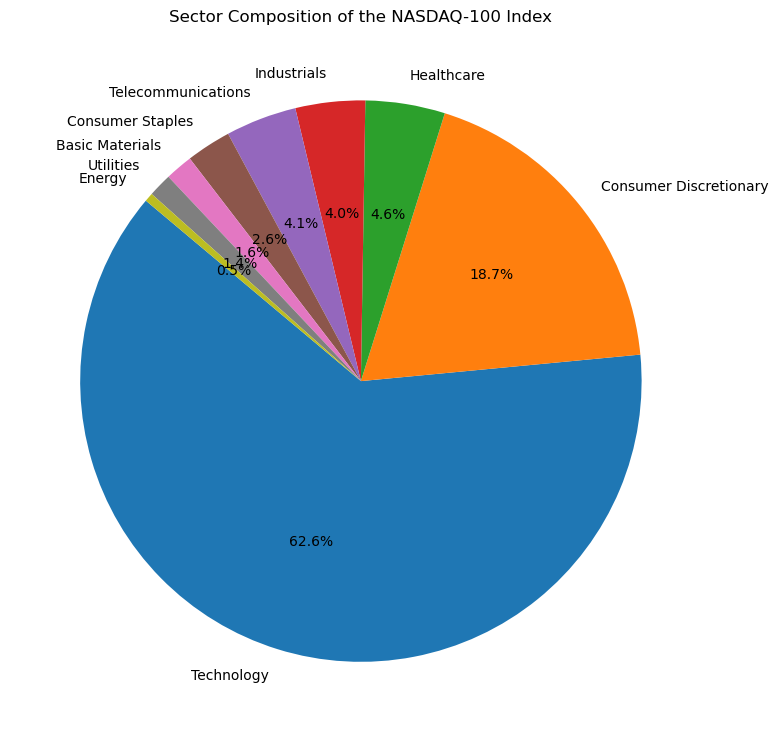

In [2]:
import matplotlib.pyplot as plt

#the accurate NASDAQ-100 sector weights
sectors = [
    "Technology",
    "Consumer Discretionary",
    "Healthcare",
    "Industrials",
    "Telecommunications",
    "Consumer Staples",
    "Basic Materials",
    "Utilities",
    "Energy"
]

weights = [62.48,18.62,4.57,4.00,4.08,2.58,1.59,1.36,0.50]

# piechart of nasdaq100 sectors
plt.figure(figsize=(8, 8))
plt.pie(weights, labels=sectors, autopct="%1.1f%%", startangle=140)
plt.title("Sector Composition of the NASDAQ-100 Index")
plt.tight_layout()
plt.show()

## Where I obtained information pertaining to the sectors

Before articulating the pie-chart I certainly ensured to conduct research about the different sectors within NASDAQ-100 index. To make sure I have accurate information I made use of:
1. **The official NASDAQ-100 Index Fact Sheet:** https://indexes.nasdaqomx.com/docs/FS_XNDX.pdf
2. **Investopedia**: https://www.investopedia.com/terms/n/nasdaq100.asp

Both these sources had similar numbers and sector weights and thus I ensured to incorporate these weights in my project. To build the piechart I certainly used Matplotlib wherein I created two lists, one for the sector names and one for their weights and then passing these into the plt.pie() function. This certainly helped me to visualize how the NASDAQ-100 is distributed across a plethora of different sectors. 

Based on the feedback I received from my professor, I certainly wanted to provide a very detailed step-by-step process for my project and thus I have articulated it in the following manner.

## Step 1 - Importing all the required, essential modules and libraries

Here I import the libraries I will use throughout the data-cleaning and preprocessing:
- `yfinance` to download the data (initially I used Kaggle but due to limited data I switched to yfinance)
- `pandas` and `numpy` which were important for data manipulation
- `matplotlib` for visualization (to give a good insight about the data and the trends)

Later, I also create simple indicators like moving averages, volatility, and RSI (which means Relative Strength Index).

In [1]:
import yfinance as yf 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")

## Step 2 - Download 24+ years of NASDAQ-100 Data

Again initially I tested out my project with the kaggle dataset which can be found here: https://www.kaggle.com/datasets/novandraanugrah/nasdaq-100-nas100-historical-price-data

However due to limited data, I decided to use `yfinance` which had a greater variety of data and for longer period of time making it more efficient to build my model using it. 

Using `yfinance`, I downloaded the daily prices for the NASDAQ-100 index (^NDX).  
I chose the range from **2000 to 2024** so I could include major events like:

- Dot-com crash (2000–2002)
- 2008 financial crisis
- COVID crash in 2020
- Post-COVID recovery

This gives my models more variety and makes any analysis much more meaningful.

In [2]:
nasdaq = yf.download("^NDX", start="2000-01-01", end="2024-12-31")

nasdaq = nasdaq.reset_index()
nasdaq.head()

/var/folders/57/5_c0gzws2kzbkc1_vj90f8v40000gn/T/ipykernel_5286/2140052825.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nasdaq = yf.download("^NDX", start="2000-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,^NDX,^NDX,^NDX,^NDX,^NDX
0,2000-01-03,3790.550049,3836.860107,3643.25000,3755.739990,1510070000
1,2000-01-04,3546.199951,3766.570068,3542.72998,3766.570068,1511840000
2,2000-01-05,3507.310059,3576.169922,3371.75000,3543.129883,1735670000
3,2000-01-06,3340.810059,3513.550049,3334.02002,3488.310059,1598320000
4,2000-01-07,3529.600098,3529.750000,3314.75000,3337.260010,1634930000


## Step 3 - Cleaning the column names

To make the dataset easier to work with, I basically converted all column names to lowercase. I learned this technique when I worked on different projects and it's easier to work with lowercase column names. This helps avoid typos when referencing columns in the later notebooks.

In [5]:
# if yfinance returns a tuple , I basically extracted the first element
if isinstance(nasdaq, tuple):
    nasdaq = nasdaq[0]

# iff the columns are MultiIndex, then I flatten them
if isinstance(nasdaq.columns, pd.MultiIndex):
    nasdaq.columns = nasdaq.columns.get_level_values(0)
nasdaq = nasdaq.reset_index()
# cleaning column names to make them lowercase and easier to work with (avoiding typos)
nasdaq.columns = [str(c).lower().replace(" ", "_") for c in nasdaq.columns]
nasdaq.head()

,index,date,close,high,low,open,volume
0,0,2000-01-03,3790.550049,3836.860107,3643.25000,3755.739990,1510070000
1,1,2000-01-04,3546.199951,3766.570068,3542.72998,3766.570068,1511840000
2,2,2000-01-05,3507.310059,3576.169922,3371.75000,3543.129883,1735670000
3,3,2000-01-06,3340.810059,3513.550049,3334.02002,3488.310059,1598320000
4,4,2000-01-07,3529.600098,3529.750000,3314.75000,3337.260010,1634930000


## Step 4 - Creating Log Returns

From my research I learned that stock prices themselves are not ideal for ML models, so I created log returns.  

To give more details. In simple words, a **log return** tells me how much the index changed from one day to the next in percentage terms, which is mathematically much more cleaner.

Log returns are useful because they certainly:
- Make the data more stable
- Handle large changes better
- and make time series modeling much more easier and effective

In [6]:
nasdaq["log_return"] = np.log(nasdaq["close"] / nasdaq["close"].shift(1))
nasdaq.head()

,index,date,close,high,low,open,volume,log_return
0,0,2000-01-03,3790.550049,3836.860107,3643.25000,3755.739990,1510070000,NaN
1,1,2000-01-04,3546.199951,3766.570068,3542.72998,3766.570068,1511840000,-0.066635
2,2,2000-01-05,3507.310059,3576.169922,3371.75000,3543.129883,1735670000,-0.011027
3,3,2000-01-06,3340.810059,3513.550049,3334.02002,3488.310059,1598320000,-0.048636
4,4,2000-01-07,3529.600098,3529.750000,3314.75000,3337.260010,1634930000,0.054971


## Step 5 - Adding Simple Technical Indicators

To help my models capture short-term and medium-term trends, I added a few commonly used indicators such as:

- **MA5:** 5-day moving average  
- **MA20:** 20-day moving average  
- **Volatility:** 20-day rolling standard deviation  
- **RSI:** A momentum indicator that shows whether the index is overbought or oversold  

So I did not add too many features to keep the project simple and easy to explain.

Talking about where I learned these indicators from, I certainly understood and learned these concepts from some of the class materials and also by conducting research of the standard financial analysis resources out there. I spent a great deal of time learning about moving averages, rolling volatility, RSI and momentum indicators from sites such as Investopedia and Investing. These resources certainly helped me to understand how indicators are calculated and why they are mainly used in machine-learning approaches to financial forecasting.

Here are the references I made use of:
1. Moving Averages: https://www.investopedia.com/terms/m/movingaverage.asp
2. Rolling Volatility: https://www.investopedia.com/terms/v/volatility.asp
3. RSI: https://www.investopedia.com/terms/r/rsi.asp
4. Investing: https://www.investing.com/indices/nq-100-technical

In [7]:
# moving averages
nasdaq["ma5"] = nasdaq["close"].rolling(5).mean()
nasdaq["ma20"] = nasdaq["close"].rolling(20).mean()

# rolling volatility
nasdaq["volatility"] = nasdaq["log_return"].rolling(20).std()

# rsi calculation
def compute_rsi(series, window=14):
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

nasdaq["rsi"] = compute_rsi(nasdaq["close"])

## Step 6 - Creating Prediction Targets

Since my research question involves predicting both **next-day returns** and **next-week returns**, I created:

- `target_next_day_return`: the log return for the following day  
- `target_next_week_return`: the log return 5 days ahead  
- `target_direction`: a binary label (1 if next-day return > 0, else its 0)

I will be using these targets in Notebook 2 when training the classical and deep learning models.

Talking about how I learned this target engineering approach. I would say that the idea of predicting forward returns certainly comes from the field of quantitative finance and time-series modelling. Investopedia really helped me understand how log returns work and why financial modeling makes use of it. There were some notebooks that I found out on Kaggle that played a pivotal role in providing examples of shifting return values to create prediction targets. Some other resources I made use of to learn these concepts include:
1. CFA Institute: https://blogs.cfainstitute.org/investor/2015/10/21/making-sense-of-long-term-returns/

In [8]:
nasdaq["target_next_day_return"] = nasdaq["log_return"].shift(-1)
nasdaq["target_next_week_return"] = np.log(nasdaq["close"].shift(-5) / nasdaq["close"])
nasdaq["target_direction"] = (nasdaq["target_next_day_return"] > 0).astype(int)

## Step 7 - Dropping the missing rows

So because the targets and technical indicators like moving averages, volatility, RSI all create NaN values at the start and end of the dataset, I certainly removed rows with missing values.

This gives me a clean dataset ready for modeling.

In [9]:
nasdaq_clean = nasdaq.dropna().reset_index(drop=True)
nasdaq_clean.head()

,index,date,close,high,low,open,volume,log_return,ma5,ma20,volatility,rsi,target_next_day_return,target_next_week_return,target_direction
0,20,2000-02-01,3701.780029,3703.590088,3544.929932,3580.290039,1398240000,0.036234,3586.463965,3628.669995,0.037532,56.083963,0.006108,0.093051,1
1,21,2000-02-02,3724.459961,3785.360107,3693.949951,3700.199951,1527880000,0.006108,3607.113965,3637.582996,0.034236,59.850592,0.033453,0.063456,1
2,22,2000-02-03,3851.159912,3857.340088,3704.229980,3726.129883,1722330000,0.033453,3658.715967,3654.775488,0.034755,59.616737,0.006009,0.060171,1
3,23,2000-02-04,3874.370117,3929.810059,3856.830078,3858.600098,1751450000,0.006009,3744.364014,3681.453491,0.032412,57.226972,0.015106,0.024103,1
4,24,2000-02-07,3933.340088,3933.750000,3858.889893,3873.429932,1625540000,0.015106,3817.022021,3701.640491,0.030503,57.442010,0.032376,0.013332,1


## Step 8 - Quick Visualization

Before modeling, I wanted to visualize the closing price of the NASDAQ-100 over time.
This step is important because it helps me understand the long-term behavior and also confirms whether the data was downloaded correctly. 

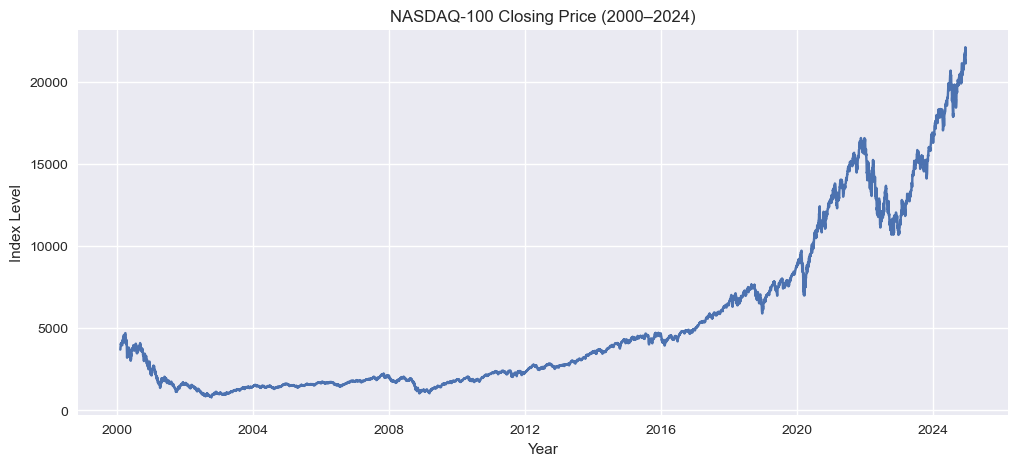

In [10]:
plt.figure(figsize=(12, 5))
plt.plot(nasdaq_clean["date"], nasdaq_clean["close"])
plt.title("NASDAQ-100 Closing Price (2000–2024)")
plt.xlabel("Year")
plt.ylabel("Index Level")
plt.show()

## Step 9 - Saving the data as a simple Dataset for Modeling

After all the above data preprocessing steps, I finally saved the cleaned and feature-engineered dataset into a CSV file called 'nasdaq_processed.csv'.

The reason I did this is so that it becomes easier to articulate and manage the Notebook 2 where I will be constructing my models and deriving conclusions.

In [11]:
nasdaq_clean.to_csv("nasdaq_processed.csv", index=False)
nasdaq_clean.shape

(6263, 15)